In [25]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [62]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019 (2).csv


In [63]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [65]:
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13169,9940337,Top floor of Brooklyn townhouse - South Slope,14314420,Josh,Brooklyn,South Slope,40.66086,-73.98421,Entire home/apt,150,2,21,2019-04-21,0.82,1,11
23863,19261252,Luxurious Designer brownstone with backyard,5453550,Christine & James,Brooklyn,Clinton Hill,40.69556,-73.96611,Entire home/apt,425,4,38,2019-07-02,1.74,3,262
25831,20660511,The plaza suite in brooklyn. Bedstuy style,29093058,Joann,Brooklyn,Bedford-Stuyvesant,40.69574,-73.93975,Private room,250,2,0,NaN,NaN,2,173
20047,16054225,Luxury doorman building great view NYC,104542199,Ray,Manhattan,Upper East Side,40.78200,-73.95143,Private room,200,2,3,2017-09-19,0.09,1,90
36659,29146109,CozyPlace 20%off Week Pvt Entrance 18min Manha...,28260018,Ivan,Queens,Ditmars Steinway,40.77612,-73.90456,Private room,96,1,63,2019-06-17,7.08,1,80
6904,4937135,Big & bright apt in Harlem!,25439443,Joel,Manhattan,Harlem,40.81831,-73.93833,Entire home/apt,85,30,5,2017-07-31,0.11,1,7
45374,34709658,Hudson Yards 2 bedrooms apartment- 4-5 ppl,240099532,Luiggi,Manhattan,Hell's Kitchen,40.75445,-73.99707,Entire home/apt,269,2,8,2019-06-26,5.45,1,252
19673,15758511,"Super spacious LES apt, close to subway/good e...",903086,Kasey,Manhattan,Lower East Side,40.71206,-73.98824,Private room,99,5,0,NaN,NaN,1,0
43597,33745352,温暖的双人房间,140630987,Jiali,Queens,Flushing,40.75966,-73.81469,Private room,65,1,11,2019-06-21,3.79,6,126
4050,2569466,Shared studio in East Harlem,13156191,Serenity,Manhattan,East Harlem,40.79731,-73.94231,Shared room,55,1,10,2015-08-18,0.20,1,0


In [66]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [67]:
# Rename Column
df.rename(columns={
'neighbourhood_group': 'city'
}, inplace=True)
df

,id,name,host_id,host_name,city,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [68]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'city', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [69]:
df.shape

(48895, 16)

In [70]:
# Checking missing values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
city                                  0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are 4 columns contain a missing value. name,host_name and reviews_per_month is not necessary for analysis,so we can drop it. last_review is date,this variable is also insignificant. we can drop this as well.

In [71]:
# Drop unnessary columns
df.drop(['id', 'name', 'host_id', 'host_name', 
         'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month', 
       'availability_365'], axis=1, inplace=True )

In [72]:
# after dropping
df.isna().sum()

city                              0
neighbourhood                     0
calculated_host_listings_count    0
dtype: int64

In [73]:
#Check statics of the dataset
df.describe()

,calculated_host_listings_count
count,48895.000000
mean,7.143982
std,32.952519
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,327.000000


In [74]:
df.shape

(48895, 3)

In [75]:
df.dtypes

city                              object
neighbourhood                     object
calculated_host_listings_count     int64
dtype: object

Data Visualization

In [76]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [77]:
len(df.neighbourhood.unique())

221

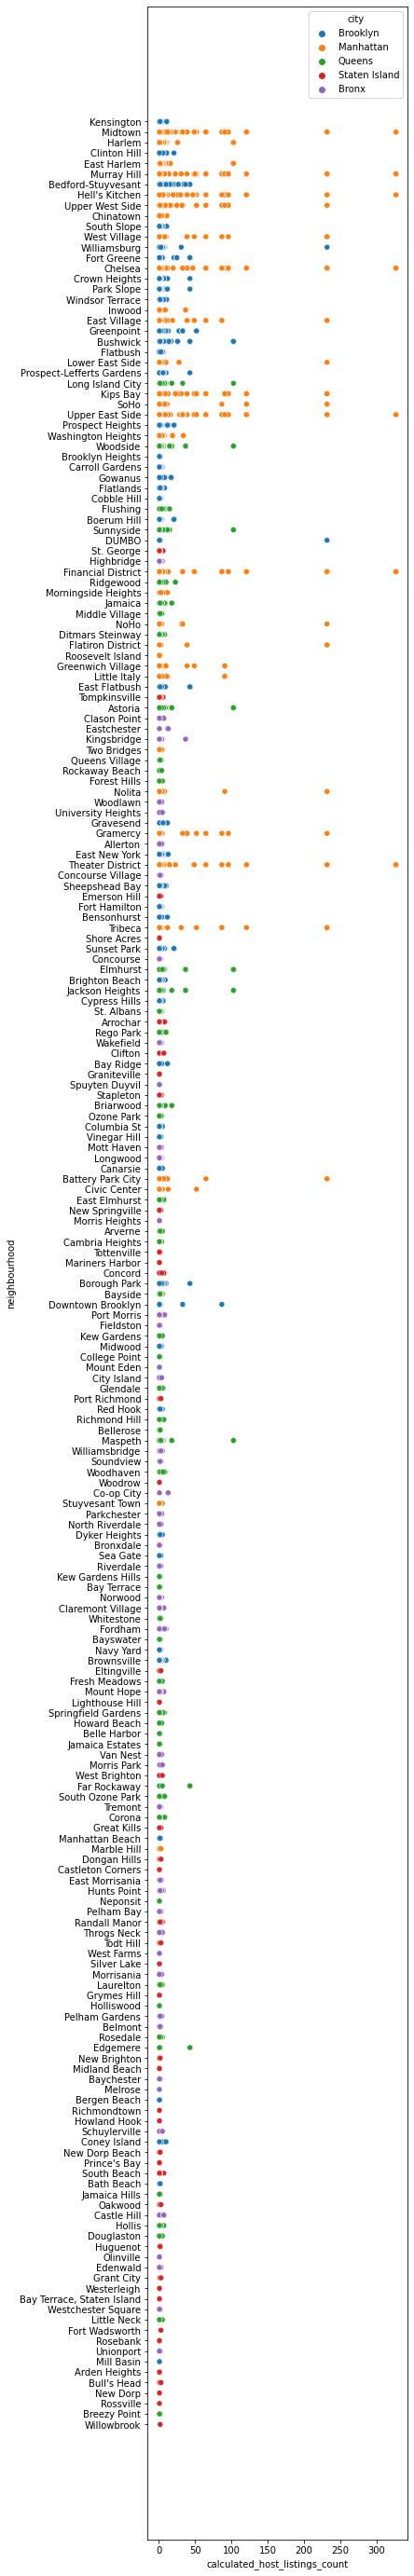

In [78]:
plt.figure(figsize=(5, 50))
sns.scatterplot(x=df.calculated_host_listings_count,y=df.neighbourhood,hue=df.city);

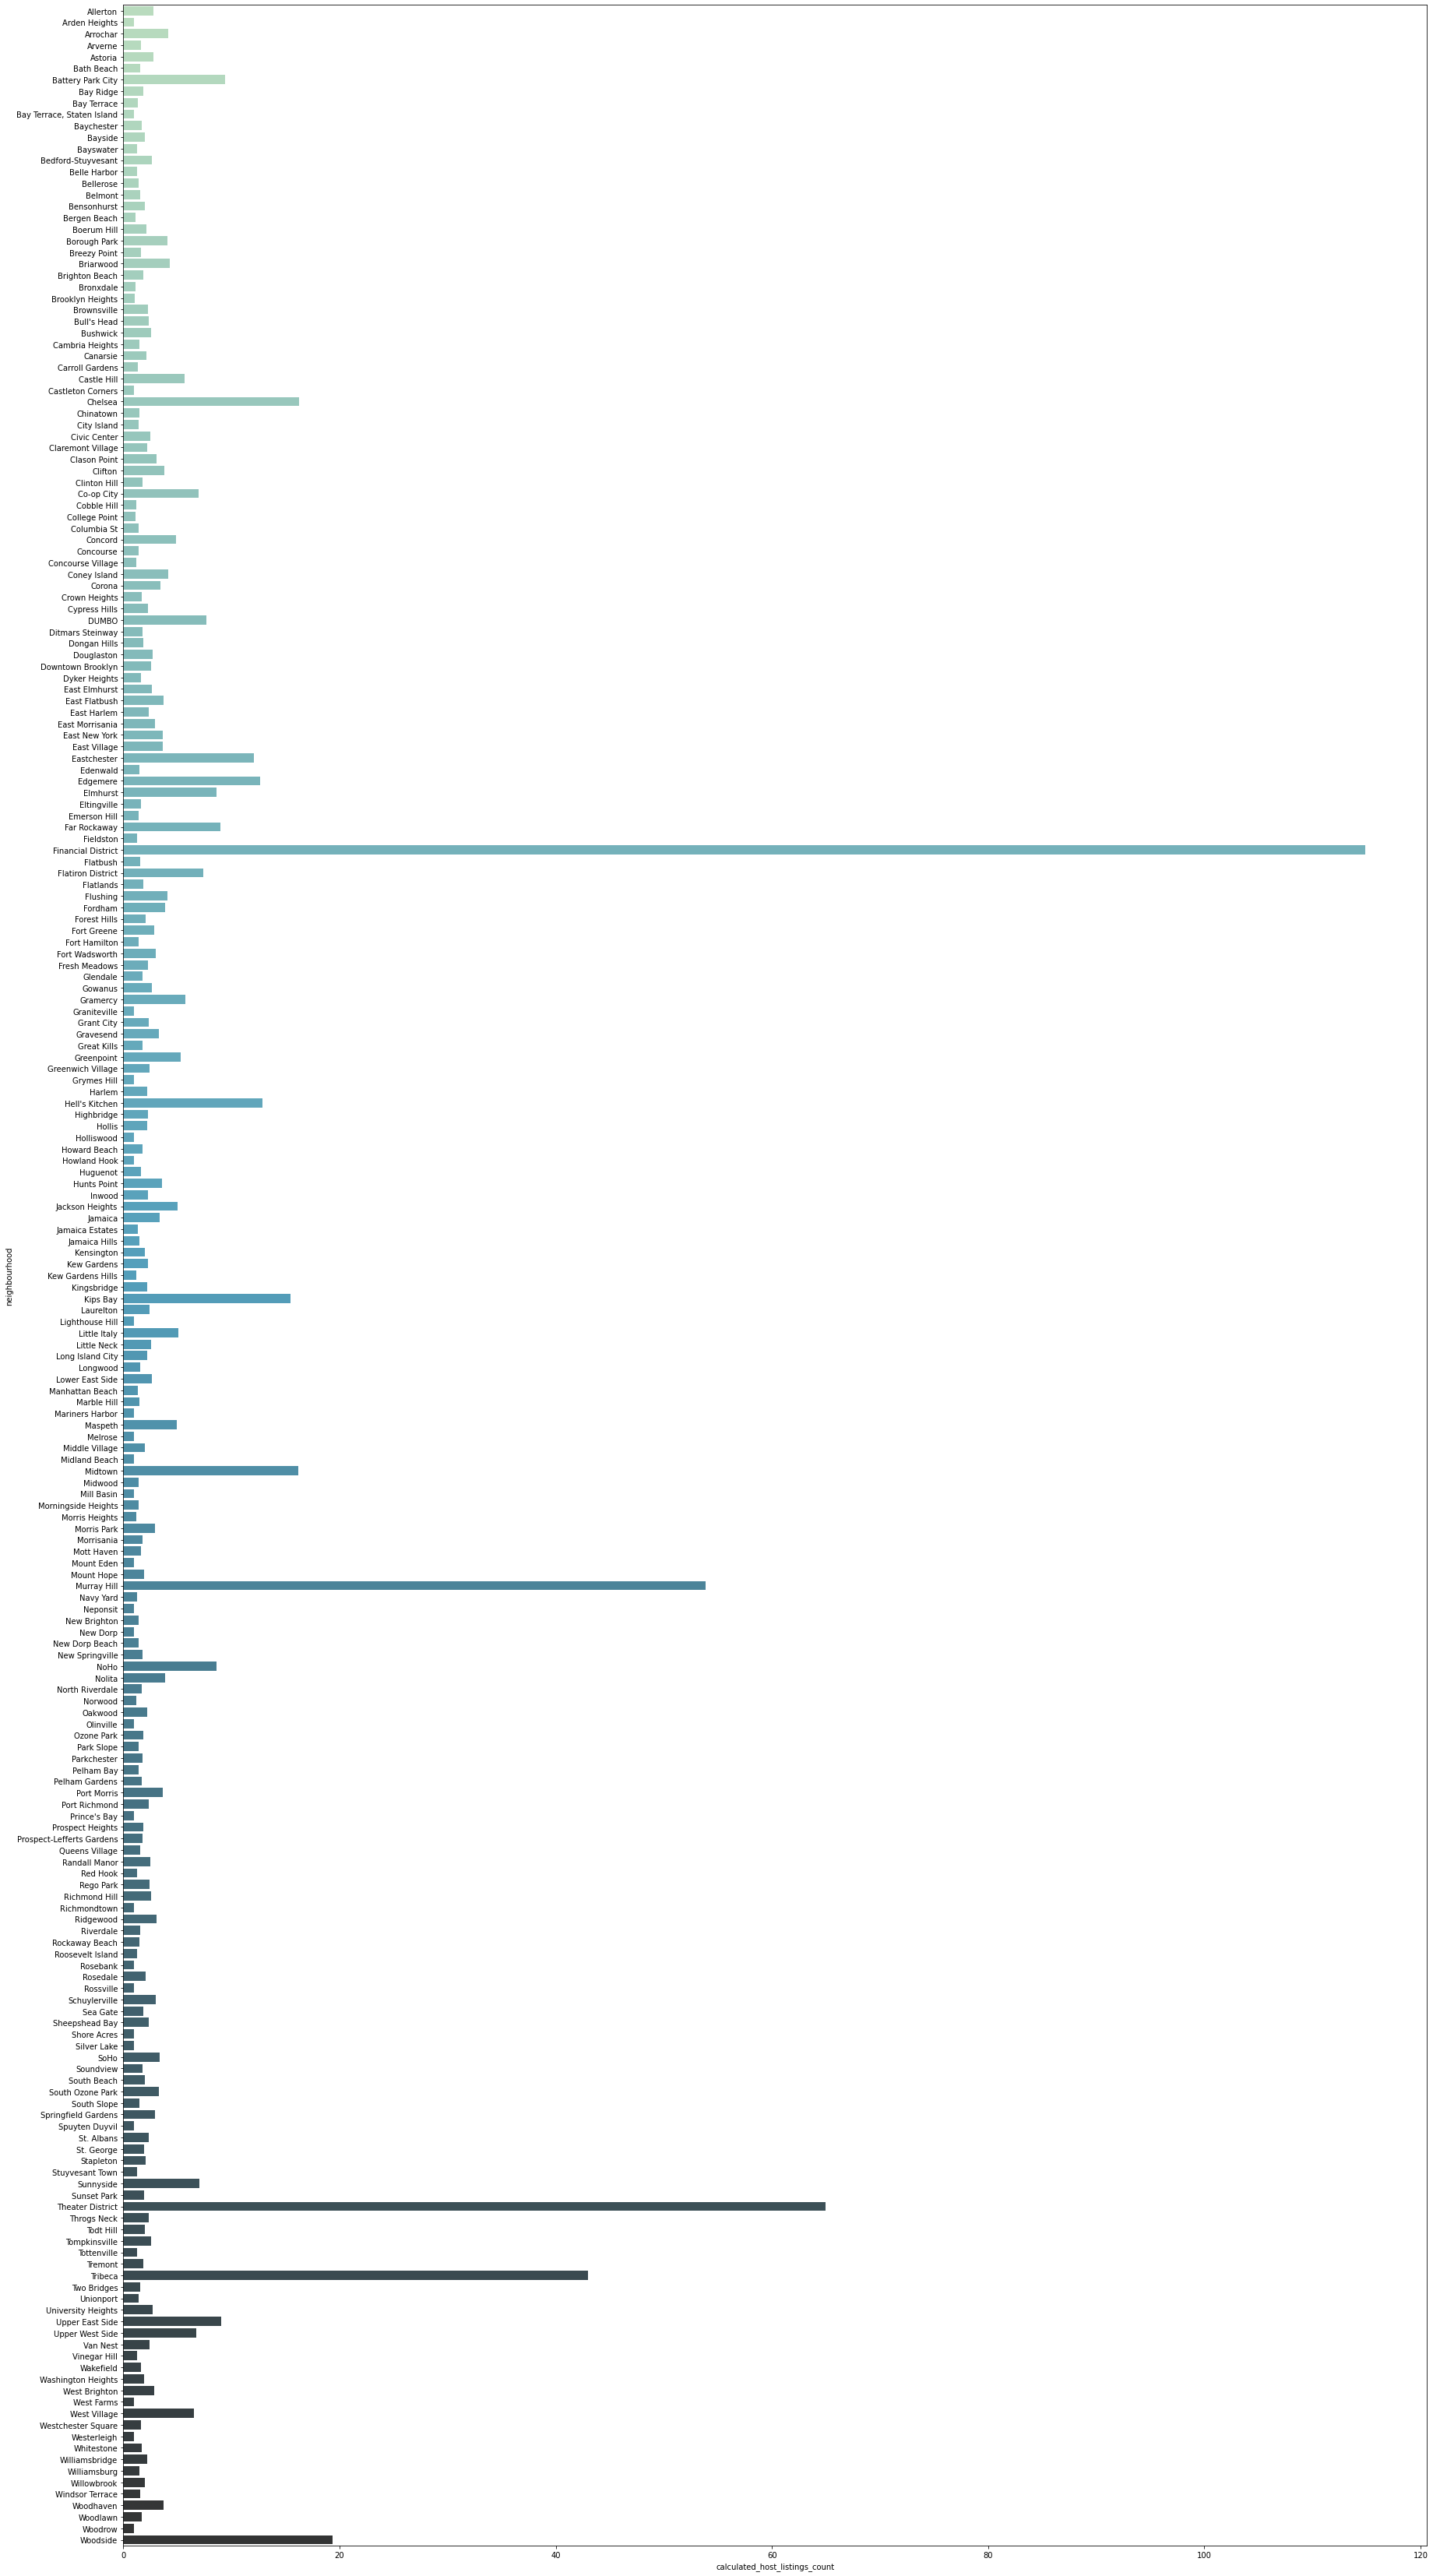

In [86]:
rtype = df.groupby('neighbourhood', as_index=False)[['calculated_host_listings_count']].mean()

plt.figure(figsize=(30,60))
sns.barplot(data=rtype, x=rtype['calculated_host_listings_count'], y=rtype['neighbourhood'], palette='GnBu_d');

The above bar plot shows that the neighbourhood in Financial District have the most listing count.